# **AN ANALYSIS OF TEHRAN HOUSE PRICES**

## **Business Understanding**
The goal of this project is to analyze factors influencing house prices in Tehran. Understanding these factors can help investors, homebuyers, and policymakers make data-driven decisions regarding real estate investments.

I will later proceed to build a predictive model to estimate house prices.

### **Key Questions**

What factors influence house prices in Tehran?

Can we predict house prices based on the given features?

What are the most important features affecting house prices?

In [ ]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV


In [ ]:
tehran_houses_url = 'https://raw.githubusercontent.com/LynneMutwiri/TehranHousePrices/refs/heads/main/housePrice.csv'

In [ ]:
#Reading the uploaded file
#Remove commas and spaces from the Area column
hse_price = pd.read_csv(tehran_houses_url, converters={'Area': lambda x: float(x.replace(',', '').strip())})
hse_price

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63.0,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60.0,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79.0,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95.0,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123.0,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33
...,...,...,...,...,...,...,...,...
3474,86.0,2,True,True,True,Southern Janatabad,3.500000e+09,116666.67
3475,83.0,2,True,True,True,Niavaran,6.800000e+09,226666.67
3476,75.0,2,False,False,False,Parand,3.650000e+08,12166.67
3477,105.0,2,True,True,True,Dorous,5.600000e+09,186666.67


In [ ]:
#Checking the number of rows and columns in the dataset
hse_price.shape

(3479, 8)

The Tehran houses dataset has **8** variables represented by 8 columns, and 3,479 houses represented by **3,479** rows.

In [ ]:
#Checking for duplicates in the dataset
hse_price.duplicated().any()

True

In [ ]:
#Checking the number of duplicated rows
hse_price.duplicated().sum()

208

There are **208** duplicated rows in the dataset.
I then proceeded to remove the duplicates, remaining only with the first occurrence of each duplicated entry.

In [ ]:
#Removing duplicates and keeping only the first occurrence
hse_price = hse_price.drop_duplicates(keep='first')

#Checking the new shape of the DataFrame to confirm duplicates were removed
print(hse_price.shape)

(3271, 8)


Having removed the 208 duplicated rows, the DataFrame now has **3271** rows and **8** columns.

In [ ]:
#Checking for missing values in the dataset
hse_price.isnull().any()

,0
Area,False
Room,False
Parking,False
Warehouse,False
Elevator,False
Address,True
Price,False
Price(USD),False


I observe that there are missing value(s) in the **Address** column.
I will proceed to find out what percentage of values are missing, which will help determine how to handle them.

In [ ]:
#Checking the percentage of missing values in the 'Address' column
missing_percentage = hse_price['Address'].isnull().mean() * 100
print(f"Percentage of missing values in Address column: {missing_percentage:.2f}%")


Percentage of missing values in Address column: 0.70%


In [ ]:
#Dropping the missing values
hse_price = hse_price.dropna(subset=['Address'])


In [ ]:
#Checking for the number of remaining rows and columns after dropping the missing values
hse_price.shape

(3248, 8)

### **Question 5:**
What cleanup was required in your dataset? Determine how to handle the missing values for your dataset.


####**Answer**

####**1. Removal of missing values**
Since the **Address** column has **0.70%** missing values, I will go ahead and remove them to maintain data quality, as this won't impact the dataset size significantly.
The alternative would have been to impute the missing values with **'Unknown'** to maintain dataset integrity without significant data loss. However, that would not be relevant to the analysis as it would introduce a new location, Unknown, which wouldn't bring about any relevance in the anlysis.
####**2. Removal of duplicates**
I removed duplicate entries in the dataset to maintain data integrity and avoid skewing the analysis results.

I took these steps to ensure the dataset is clean, consistent, and ready for further analysis without introducing irrelevant or inaccurate information.

In [ ]:
#Checking the columns of the dataset:
hse_price.columns

Index(['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Address', 'Price',
       'Price(USD)'],
      dtype='object')

I proceeded to convert boolean columns to numeric to enable preprocessing, and further modeling.
After that I one-hot encoded the **Address** column to convert it to a numeric format that can be used for further analysis.

In [ ]:
print(hse_price['Address'].dtype)  # Should show 'object' (for strings)
print(hse_price['Address'].unique()) # Print unique values to inspect
print(hse_price['Address'].head(10))

object
['Shahran' 'Pardis' 'Shahrake Qods' 'Shahrake Gharb'
 'North Program Organization' 'Andisheh' 'West Ferdows Boulevard' 'Narmak'
 'Saadat Abad' 'Zafar' 'Islamshahr' 'Pirouzi' 'Shahrake Shahid Bagheri'
 'Moniriyeh' 'Velenjak' 'Amirieh' 'Southern Janatabad' 'Salsabil'
 'Zargandeh' 'Feiz Garden' 'Water Organization' 'ShahrAra' 'Gisha' 'Ray'
 'Abbasabad' 'Ostad Moein' 'Farmanieh' 'Parand' 'Punak' 'Qasr-od-Dasht'
 'Aqdasieh' 'Pakdasht' 'Railway' 'Central Janatabad'
 'East Ferdows Boulevard' 'Pakdasht KhatunAbad' 'Sattarkhan' 'Baghestan'
 'Shahryar' 'Northern Janatabad' 'Daryan No'
 'Southern Program Organization' 'Rudhen' 'West Pars' 'Afsarieh'
 'Marzdaran' 'Dorous' 'Sadeghieh' 'Chahardangeh' 'Baqershahr' 'Jeyhoon'
 'Lavizan' 'Shams Abad' 'Fatemi' 'Keshavarz Boulevard' 'Kahrizak'
 'Qarchak' 'Northren Jamalzadeh' 'Azarbaijan' 'Bahar'
 'Persian Gulf Martyrs Lake' 'Beryanak' 'Heshmatieh' 'Elm-o-Sanat'
 'Golestan' 'Shahr-e-Ziba' 'Pasdaran' 'Chardivari' 'Gheitarieh'
 'Kamranieh' 'Gholhak' 

In [ ]:
#One-hot encoding 'Address' column
if 'Address' in hse_price.columns:
    hse_price = pd.get_dummies(hse_price, columns=['Address'], drop_first=True)
    #Converting newly created columns to int
    for col in hse_price.columns:
        if col.startswith('Address_'):  # Check if it's a new column from Address
            hse_price[col] = hse_price[col].astype(int)

#Converting boolean columns to numerical
for col in ['Parking', 'Warehouse', 'Elevator']:
    # First ensure the column contains only boolean or numeric values:
    hse_price[col] = pd.to_numeric(hse_price[col], errors='coerce').fillna(0).astype(int)

    #Converting to int if it's still boolean
    if hse_price[col].dtype == bool:
        hse_price[col] = hse_price[col].astype(int)

In [ ]:
print(hse_price.dtypes)

Area                   float64
Room                     int64
Parking                  int64
Warehouse                int64
Elevator                 int64
                        ...   
Address_Yousef Abad      int64
Address_Zafar            int64
Address_Zaferanieh       int64
Address_Zargandeh        int64
Address_Zibadasht        int64
Length: 198, dtype: object


In [ ]:
#Looping through numerical columns and creating' boxplots
for column in hse_price.select_dtypes(include='number').columns:
    plt.figure(figsize=(8, 4))
    plt.boxplot(hse_price[column].dropna(), vert=False)
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.show()

#### Next, I will plot a few visualizations to understand the distribution of various variables, including their correlation.

Histograms to show the distribution of individual variables.

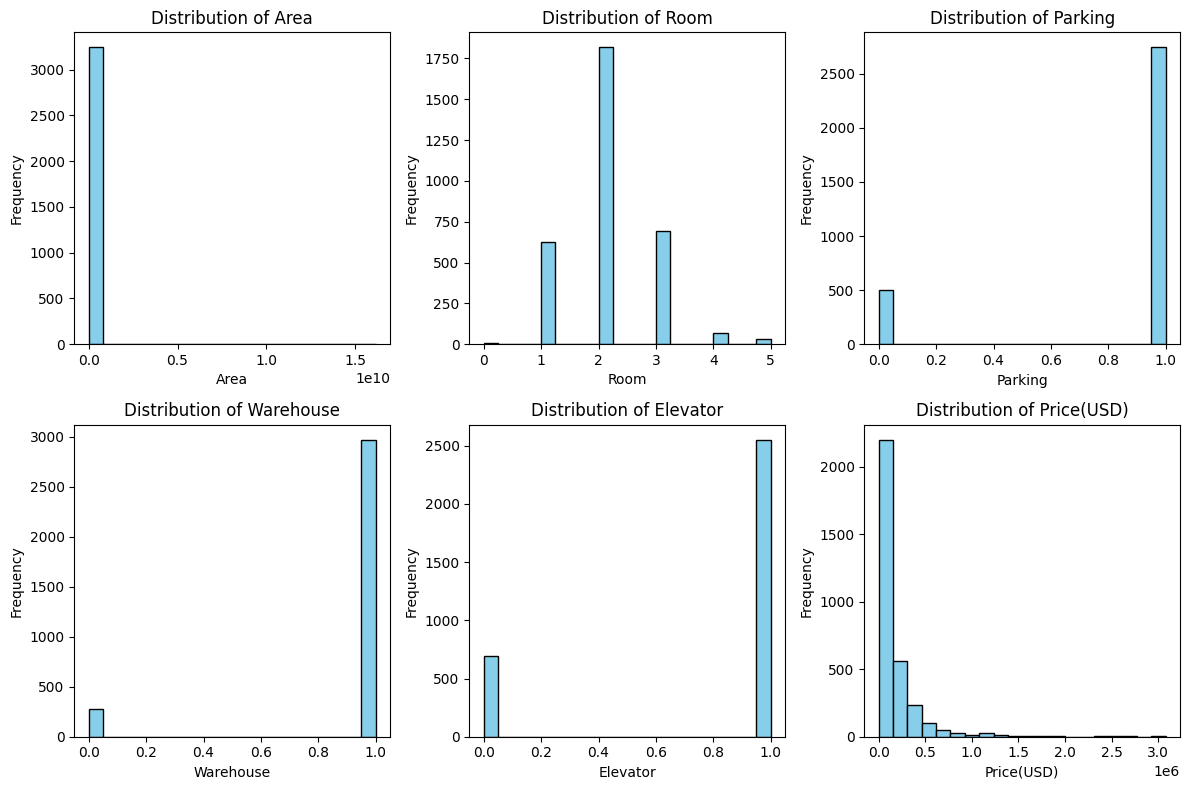

In [ ]:
#Plotting histograms for all variables except Address
num_vars = ['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Price(USD)']

plt.figure(figsize=(12, 8))
for i, col in enumerate(num_vars, 1):
    plt.subplot(2, 3, i)
    plt.hist(hse_price[col].dropna(), bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

KDE to display the probability density function(PDF) of the Price(USD) variable.

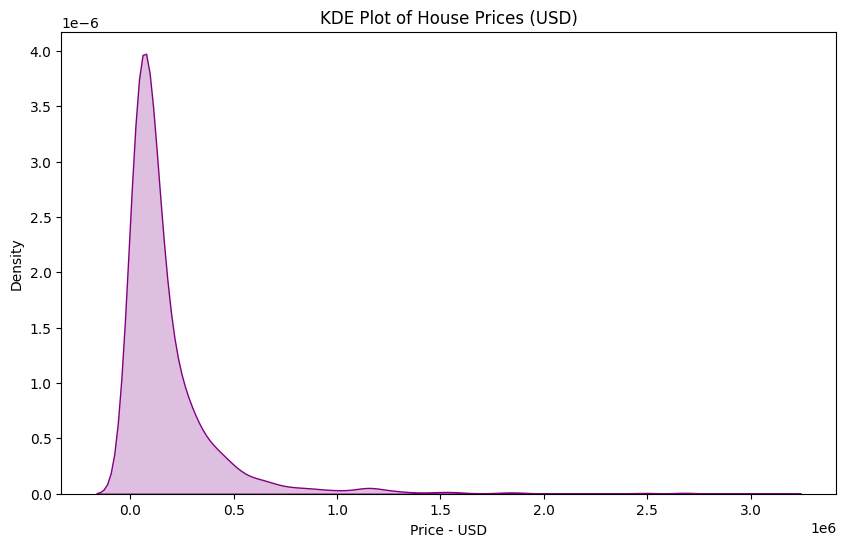

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(hse_price['Price(USD)'], fill=True, color='purple')
plt.title("KDE Plot of House Prices (USD)")
plt.xlabel("Price - USD")
plt.show()

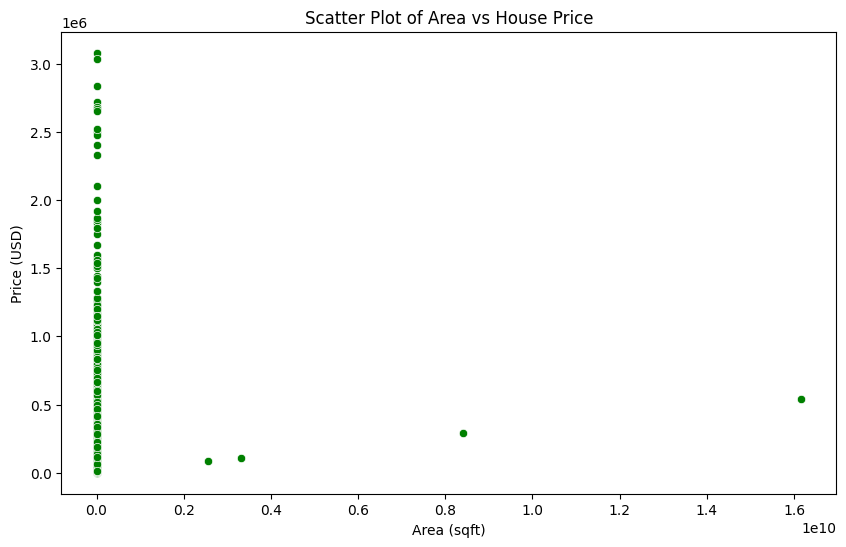

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=hse_price['Area'], y=hse_price['Price(USD)'], color='green')
plt.title("Scatter Plot of Area vs House Price")
plt.xlabel("Area (sqft)")
plt.ylabel("Price (USD)")
plt.show()

Boxplot to compare distributions of Price by the number of rooms

<ipython-input-248-0d6cdec20308>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=hse_price['Room'], y=hse_price['Price(USD)'], palette='coolwarm')


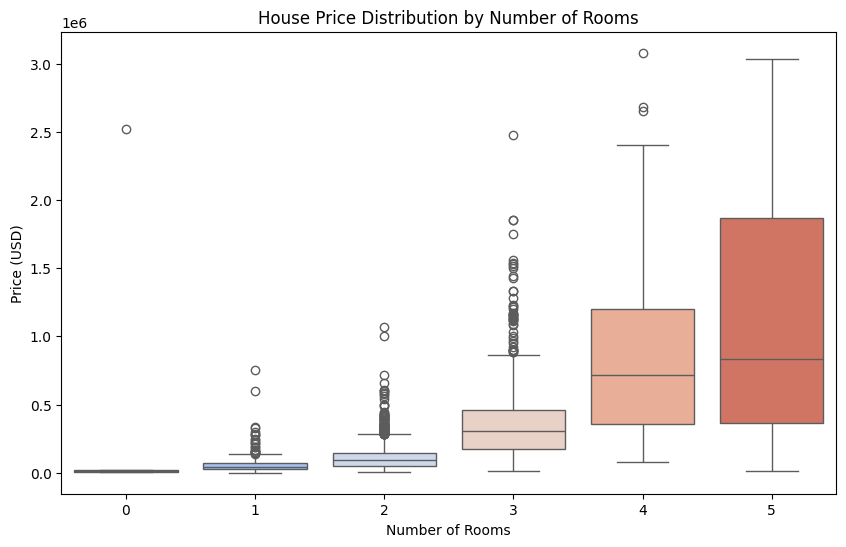

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=hse_price['Room'], y=hse_price['Price(USD)'], palette='coolwarm')
plt.title("House Price Distribution by Number of Rooms")
plt.xlabel("Number of Rooms")
plt.ylabel("Price (USD)")
plt.show()


We observe that the number of rooms is a significant factor in determining house price. There's also a wide range of prices, especially for houses with more rooms, indicating the influence of other factors.

Correlation heatmap to show the relationship between the variables.

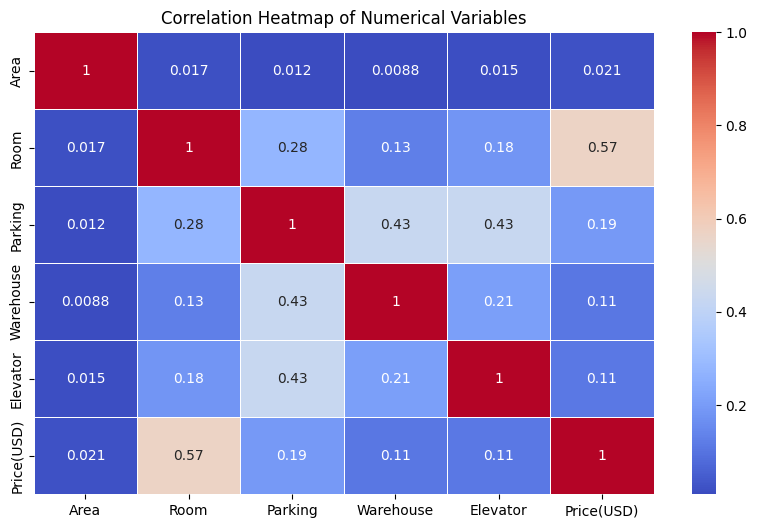

In [ ]:
#Plotting the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(hse_price[num_vars].corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Variables")
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector,

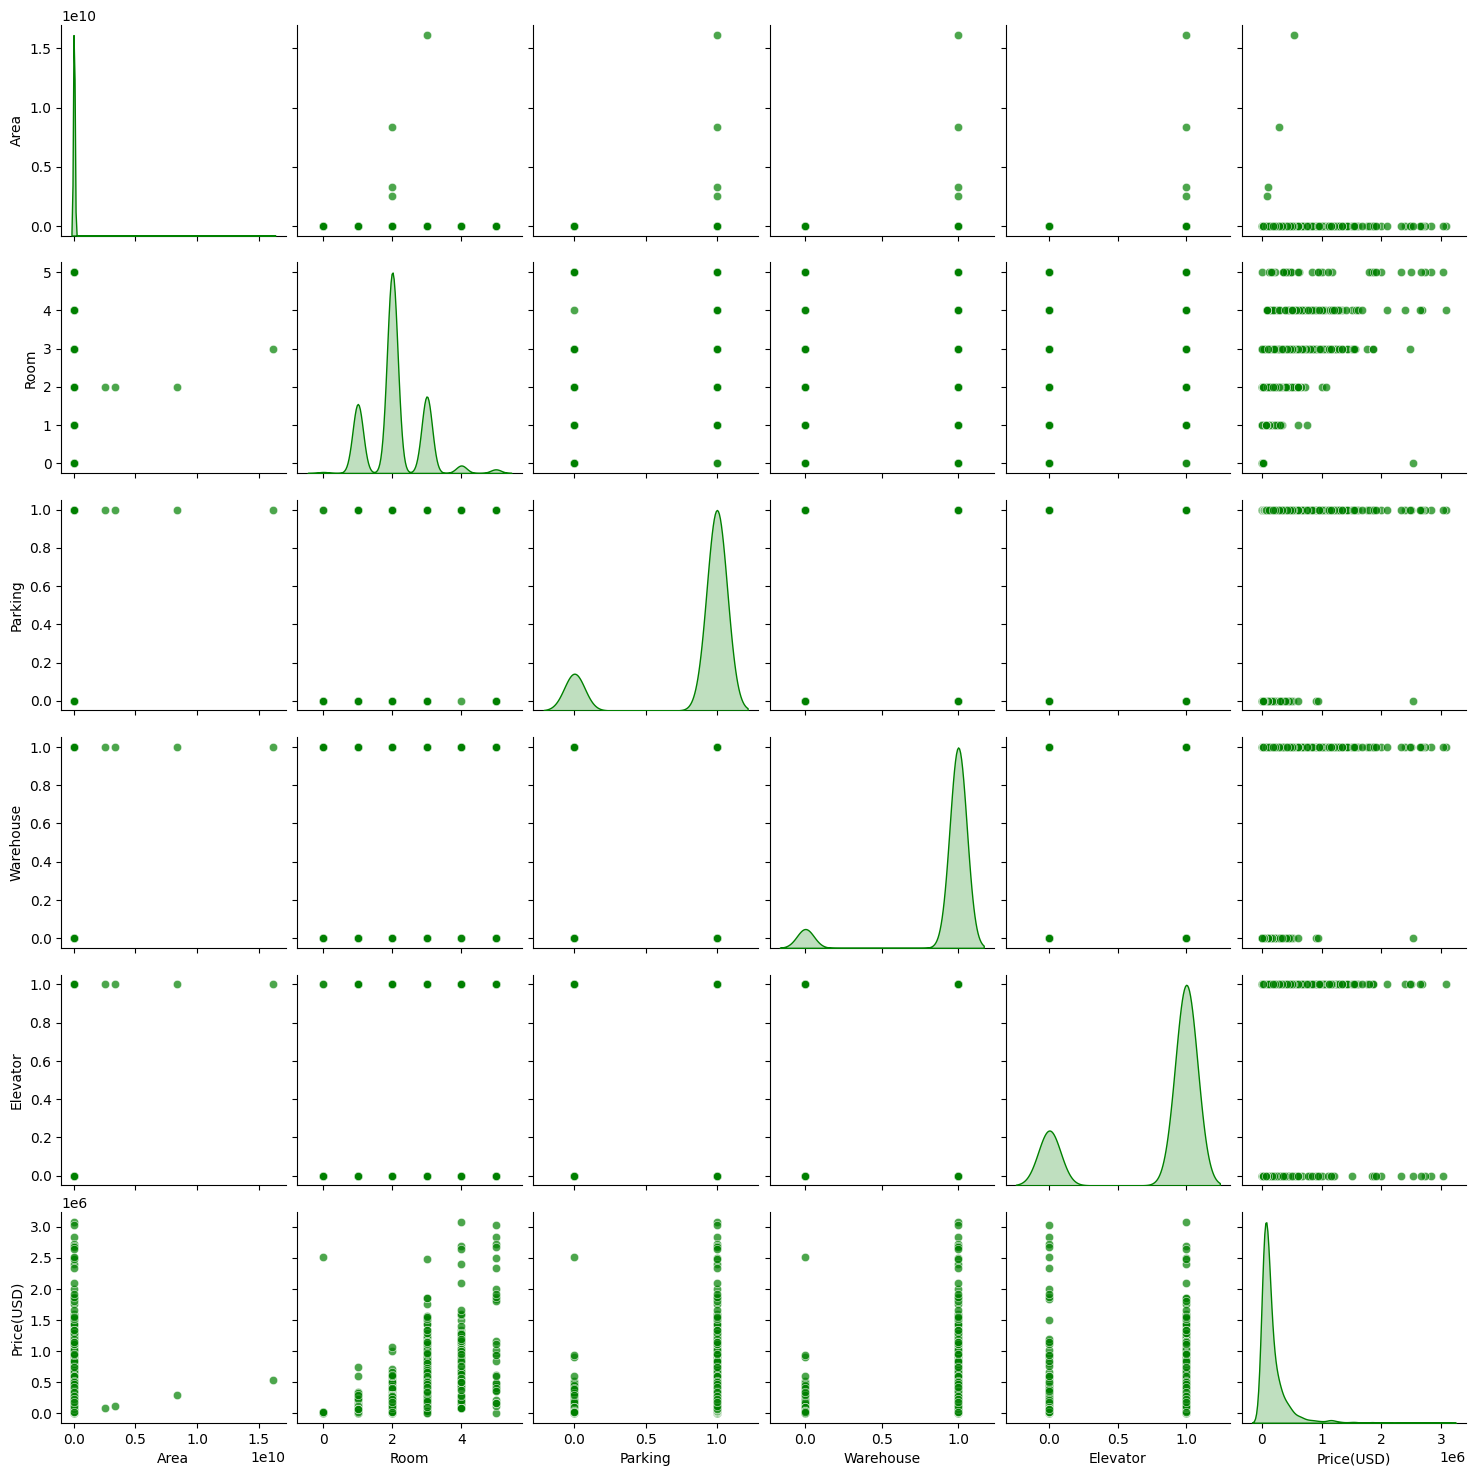

In [ ]:
custom_palette = sns.color_palette("Greens")

# Create pairplot with green colors
sns.pairplot(hse_price[num_vars], diag_kind='kde',
             plot_kws={'alpha': 0.7, 'color': 'green'},
             diag_kws={'color': 'green', 'shade': True})

# Show the plot
plt.show()


#### Some conclusions from the pairplots:

There might be a **weak positive** relationship between **Parking and Price**. Houses with parking might be slightly *more expensive* on average. However, the relationship is not very strong.

Houses with a *warehouse* seem to have *higher* prices on average compared to those without a warehouse. However, there are fewer houses with warehouses, making it harder to draw a strong conclusion.

#### 3D Scatter Plot to examine interactions between three numeric variables.

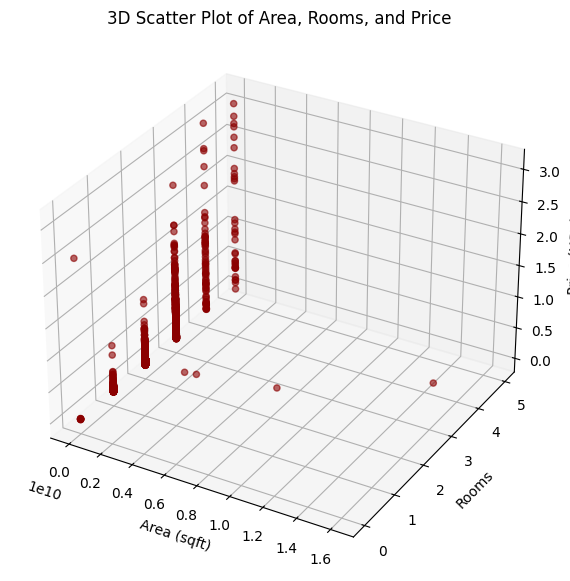

In [ ]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Use a red shade with transparency
ax.scatter(hse_price['Area'], hse_price['Room'], hse_price['Price(USD)'],
           c='darkred', alpha=0.6)

ax.set_xlabel('Area (sqft)')
ax.set_ylabel('Rooms')
ax.set_zlabel('Price (USD)')
ax.set_title("3D Scatter Plot of Area, Rooms, and Price")

plt.show()

This 3D scatter plot visualizes the relationship between area (in sq ft), number of rooms, and price. Each point represents a house, with its position determined by its values for these three variables. The plot reveals a positive correlation between all three variables. As the area increases, both the number of rooms and the price tend to increase as well.  Similarly, houses with more rooms generally have a larger area and a higher price. The data points cluster along a sort of diagonal band, illustrating the interconnectedness of these features in determining a house's value.  There are a few scattered points further out, potentially representing outliers or unique properties that deviate from the general trend. Overall, the visualization suggests that area and number of rooms are strong indicators of price.

#### Grouped Bar Plot to compare data across multiple groups.

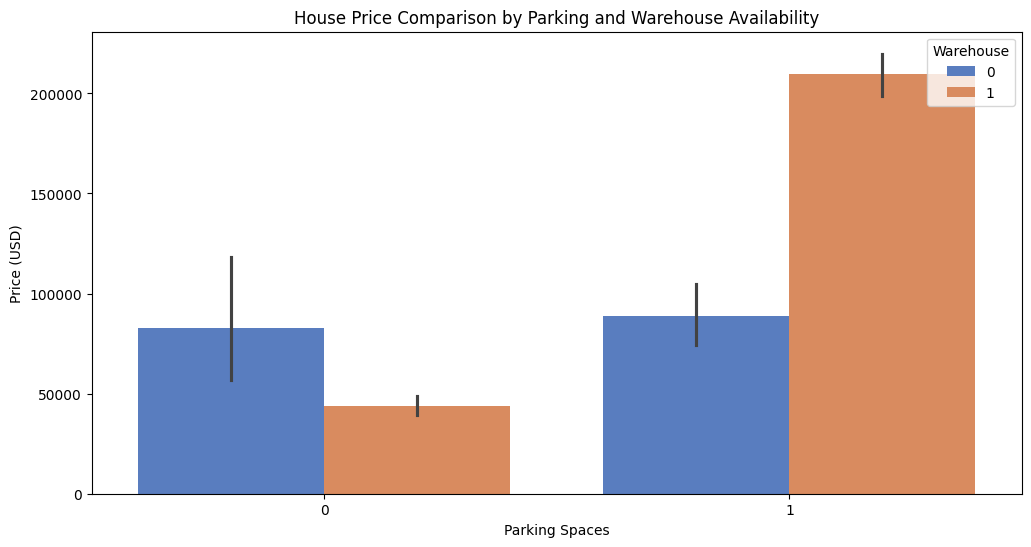

In [ ]:
#Plotting the comparison of Parking, Warehouse and Price
plt.figure(figsize=(12, 6))
sns.barplot(x='Parking', y='Price(USD)', hue='Warehouse', data=hse_price, palette="muted")
plt.title("House Price Comparison by Parking and Warehouse Availability")
plt.xlabel("Parking Spaces")
plt.ylabel("Price (USD)")
plt.legend(title="Warehouse", loc="upper right")
plt.show()

The bar chart shows the relationship between house prices, parking spaces, and warehouse availability. Houses without parking generally have lower prices, with those lacking a warehouse being more expensive than those with one. However, for houses with parking, the trend reverses significantly, as properties with both parking and a warehouse command much higher prices than those without a warehouse. This suggests that while a warehouse alone does not necessarily increase a house's value, the combination of parking and warehouse availability has a strong positive impact on house prices. The error bars indicate some variation in prices within each category, but the overall trend remains clear.

#### **Normalization**

Next, I normalized the numeric features using the StandardScaler sklearn.preprocessing library to ensure that all features contribute equally to the model and possibly improve performance.

In [ ]:
#Normalizing Area and Price(USD) features
scaler = StandardScaler()
hse_price[['Area', 'Price(USD)']] = scaler.fit_transform(hse_price[['Area', 'Price(USD)']])


I split the data into training and testing sets. X contains the features, and y is the target variable (house price).  train_test_split creates X_train, y_train (used for training), and X_test, y_test (used for evaluating model performance on unseen data).  test_size=0.2 means 20% of the data is held out for testing. random_state ensures consistent splits across runs.

In [ ]:
#Splitting the data
X = hse_price.drop('Price(USD)', axis=1)
y = hse_price['Price(USD)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **Modeling**

Machine learning models are trained using X_train (features) and y_train (target). The model's hyperparameters, such as the number of estimators in ensemble methods or regularization strength in linear models, influence its performance. A fixed random_state ensures consistent results across runs. Once trained, the model predicts outcomes on unseen X_test data (y_pred). Performance is evaluated using metrics like Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R²) to assess the accuracy of predictions against the actual values (y_test).

In [ ]:
#Defining models
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Linear Regression": LinearRegression(),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "Support Vector Regressor": SVR()
}

#Training, predicting, and evaluating each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    #Evaluating performance
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Model: {name}")
    print(f"  Mean Absolute Error (MAE): {mae:.4f}")
    print(f"  Mean Squared Error (MSE): {mse:.4f}")
    print(f"  R-squared (R2): {r2:.4f}\n")


Model: Random Forest
  Mean Absolute Error (MAE): 0.0022
  Mean Squared Error (MSE): 0.0002
  R-squared (R2): 0.9998

Model: Linear Regression
  Mean Absolute Error (MAE): 0.0000
  Mean Squared Error (MSE): 0.0000
  R-squared (R2): 1.0000

Model: Gradient Boosting
  Mean Absolute Error (MAE): 0.0056
  Mean Squared Error (MSE): 0.0001
  R-squared (R2): 0.9998

Model: Support Vector Regressor
  Mean Absolute Error (MAE): 0.0660
  Mean Squared Error (MSE): 0.0053
  R-squared (R2): 0.9937



### Key observations from the model performance evaluation:

Based on the evaluation metrics, **Linear Regression** performs the best on this dataset, achieving a **MAE** of **0.0000**, **MSE** of **0.0000**, and an **R²** of *1.0000*, indicating a perfect fit to the data. This suggests that the relationship between the features and target is likely linear, making Linear Regression an ideal choice for this dataset.

Both *Random Forest* and *Gradient Boosting* also perform well, with very low MAE and MSE values and an **R²** of *0.9998*, indicating strong predictive power. However, *Gradient Boosting* has a slightly higher MAE than Random Forest, meaning its predictions deviate slightly more from actual values.

The *SVR* has the lowest performance, with a higher MAE *(0.0660)*, MSE *(0.0053)*, and an R² of *0.9937*, suggesting it struggles to capture the patterns in the data as effectively as the other models.


### **Hyperparameter Tuning**

For model training and hyperparameter tuning, I optimized the above regression models. I tuned the Random Forest Regressor by adjusting n_estimators, max_depth, and min_samples_split. Linear Regression has no major hyperparameters but I included it as a baseline for comparison. I optimized the Gradient Boosting Regressor by tuning n_estimators, learning_rate, and max_depth. For the Support Vector Regressor (SVR), I adjusted C, kernel, and gamma to find the best configuration. To ensure better generalization and reduce overfitting, I used cross-validation, evaluating model performance across multiple folds

In [ ]:
#Defining models and hyperparameter grids
param_grids = {
    "Random Forest": {
        "n_estimators": [50, 100, 200],
        "max_depth": [None, 10, 20],
        "min_samples_split": [2, 5, 10]
    },
    "Gradient Boosting": {
        "n_estimators": [50, 100, 200],
        "learning_rate": [0.01, 0.1, 0.2],
        "max_depth": [3, 5, 10]
    },
    "Support Vector Regressor": {
        "C": [0.1, 1, 10],
        "kernel": ["linear", "rbf"],
        "gamma": ["scale", "auto"]
    }
}

#Models dictionary (excluding Linear Regression as it has no hyperparameters)
models = {
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Support Vector Regressor": SVR()
}

#Training, tuning and evaluating the models
results = {}

for name, model in models.items():
    print(f"Training {name} with GridSearchCV...")

    #Performing Grid Search with 5-fold cross-validation
    grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='r2', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    #Getting the best model
    best_model = grid_search.best_estimator_

    #Predicting on test set
    y_pred = best_model.predict(X_test)

    #Evaluating model performance
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    #Storing the results
    results[name] = {
        "Best Params": grid_search.best_params_,
        "MAE": mae,
        "MSE": mse,
        "R2": r2
    }

    print(f"Best Parameters for {name}: {grid_search.best_params_}")
    print(f"  Mean Absolute Error (MAE): {mae:.4f}")
    print(f"  Mean Squared Error (MSE): {mse:.4f}")
    print(f"  R-squared (R2): {r2:.4f}\n")

#Training and evaluating Linear Regression separately (no hyperparameters)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

#Evaluating the Linear Regression model
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

results["Linear Regression"] = {
    "Best Params": "N/A",
    "MAE": mae_lr,
    "MSE": mse_lr,
    "R2": r2_lr
}

print("Linear Regression Performance:")
print(f"  Mean Absolute Error (MAE): {mae_lr:.4f}")
print(f"  Mean Squared Error (MSE): {mse_lr:.4f}")
print(f"  R-squared (R2): {r2_lr:.4f}\n")

#Summary of results
print("\nModel Comparison:")
for model, metrics in results.items():
    print(f"{model}: R2 = {metrics['R2']:.4f}, MAE = {metrics['MAE']:.4f}, MSE = {metrics['MSE']:.4f}")



Training Random Forest with GridSearchCV...
Best Parameters for Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
  Mean Absolute Error (MAE): 0.0022
  Mean Squared Error (MSE): 0.0002
  R-squared (R2): 0.9998

Training Gradient Boosting with GridSearchCV...
Best Parameters for Gradient Boosting: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}
  Mean Absolute Error (MAE): 0.0060
  Mean Squared Error (MSE): 0.0002
  R-squared (R2): 0.9997

Training Support Vector Regressor with GridSearchCV...
Best Parameters for Support Vector Regressor: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
  Mean Absolute Error (MAE): 0.0655
  Mean Squared Error (MSE): 0.0053
  R-squared (R2): 0.9936

Linear Regression Performance:
  Mean Absolute Error (MAE): 0.0000
  Mean Squared Error (MSE): 0.0000
  R-squared (R2): 1.0000


Model Comparison:
Random Forest: R2 = 0.9998, MAE = 0.0022, MSE = 0.0002
Gradient Boosting: R2 = 0.9997, MAE = 0.0060, MSE = 0.0002
Support Vec

### Results Interpretation

The MAE represents the average absolute difference between the predicted house prices and the actual prices.  A value of 0.00217 is extremely low, suggesting that the model's predictions are, on average, very close to the true values.

The MSE is the average of the squared differences between the predictions and the actual values.  While MSE is also very low, it's a bit harder to interpret directly because of the squaring.  It's more useful for comparing different models; a lower MSE generally indicates a better model.  Because it penalizes larger errors more heavily than MAE, the fact that it is so low(**0.000166**) further reinforces the model's strong performance.

The R-squared value represents the proportion of the variance in the target variable (house price) that is explained by the model.  An R-squared of (**0.9998**) is incredibly close to 1, which is the highest possible score.  This implies that your model explains nearly all of the variability in house prices.

#### **Question 2**
Look at some of the histograms for your data? How would you explain one of them to someone who is not familiar with your data?

#### **Answer**
The histogram displays the distribution of house prices in the Tehran dataset. Here's a breakdown of what it shows:

#### **Shape**:

**Right-skewed**: The majority of houses are priced lower, with a tail extending towards higher prices. This indicates that there are fewer houses with very high prices compared to those with lower prices.

#### **Central Tendency**:

**Mean**: The mean price is likely to be higher than the median due to the right-skewed distribution.

**Median**: The median price would be a better representation of the "typical" house price in this dataset.

#### **Spread**:

**Range**: The range is the difference between the highest and lowest price, indicating the overall spread of prices.

**Variance/Standard Deviation**: These measures quantify how much the prices deviate from the mean. A higher variance/standard deviation suggests more variability in prices.

####**Outliers**:

There are a few houses with extremely high prices, appearing as outliers on the right tail of the histogram.

#### **Overall Interpretation:**

The histogram suggests that the housing market in this dataset is not evenly distributed. Most houses are relatively affordable, but there are a significant number of high-priced houses that skew the distribution. This information can be useful for real estate agents, buyers, and researchers to understand the market dynamics and make informed decisions.

Looking at the histogram of Price, it is clear that most properties in this dataset are priced in the lower range, with the majority falling below $500k. This suggests that the dataset contains many more affordable properties than luxury or high-priced ones. The long tail extending towards the higher end shows that there are fewer but more expensive properties in the dataset. This could represent high-end real estate or properties in prime locations that are priced significantly higher than the majority.

####**Question 4**
Consider who would be interested in your dataset. Identify at least three organizations or individuals that would be interested in your insights. Why?

#### **Answer**

**Real Estate Agencies and Property Developers:** My insights can help them identify market trends, predict future property values and make more informed decisions about where to build new homes or invest in existing properties. Understanding the factors that influence property prices, such as location, square footage and amenities, can also help them optimize their pricing strategies and marketing efforts.

**Investment Firms and Mortgage Lenders:** Theses would benefit from my insights to assess the viability of property investments. Analyzing trends in house prices helps them make better lending decisions, determine which areas are likely to see price appreciation, and mitigate risks associated with lending. Mortgage lenders could also use this information to adjust their loan terms based on market conditions and the value of properties.

**Urban Planners and Local Governments:** could use these insights to understand housing affordability, the dynamics of different neighborhoods and trends in housing demand. This information can guide policy decisions regarding housing development and infrastructure planning. Understanding house price variations across regions can also help them address housing shortages or overvalued areas and plan for more sustainable urban development.


**My biggest take-away from the video**  ***Discussion Analytics to AI***.

As a Data Scienctist, the key is to start with the Objective function - the thing I'm supposed to maximize, minimize and/or optimize. The models I should use, as a Data Scientist, must tell me how I should, say, maximize revenue.

Using the objective function helps clarify the goal, determine what data to chase and what metrics to track.